---
#  mplfinance
---
### Some examples of using the new mplfinance package.
---

In [1]:
# This allows multiple outputs from a single jupyter notebook cell:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import pandas as pd
pd.__version__  # for the record

'0.24.2'

In [3]:
# plots outside the notebook:
#%matplotlib qt     
# plots within the notebook:
%matplotlib inline

---

### Let's read in some daily data for the S&P 500 from November of 2019 

In [4]:
daily = pd.read_csv('data/SP500_NOV2019_Hist.csv',index_col=0,parse_dates=True)
daily.index.name = 'Date'
daily.shape
daily.head(3)
daily.tail(3)

(20, 5)

,Open,High,Low,Close,Volume
Date,,,,,
2019-11-01,3050.72,3066.95,3050.72,3066.91,510301237
2019-11-04,3078.96,3085.20,3074.87,3078.27,524848878
2019-11-05,3080.80,3083.95,3072.15,3074.62,585634570


,Open,High,Low,Close,Volume
Date,,,,,
2019-11-26,3134.85,3142.69,3131.00,3140.52,986041660
2019-11-27,3145.49,3154.26,3143.41,3153.63,421853938
2019-11-29,3147.18,3150.30,3139.34,3140.98,286602291


---
## Importing mplfinance

In [5]:
import mplfinance as mpf

---
### Plotting open,high,low,close data is as simple as calling `mpf.plot()` on the dataframe

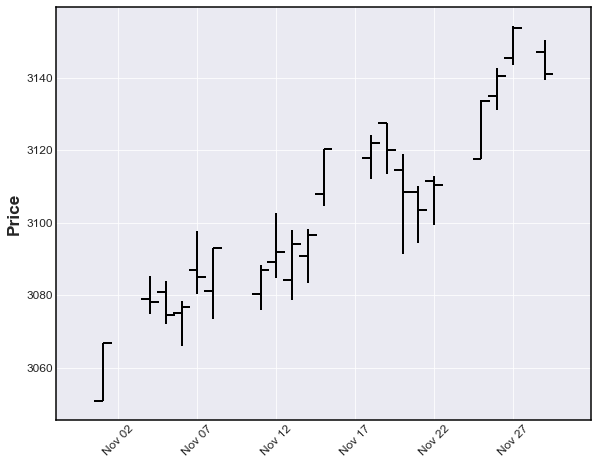

In [6]:
mpf.plot(daily)  # the default plot type is 'ohlc'

---

### The default plot type, as you can see above, is `'ohlc'`
  
### Other plot types can be specified with the keyword argument `type`,<br> for example, `type='candle'` or `type='line'`


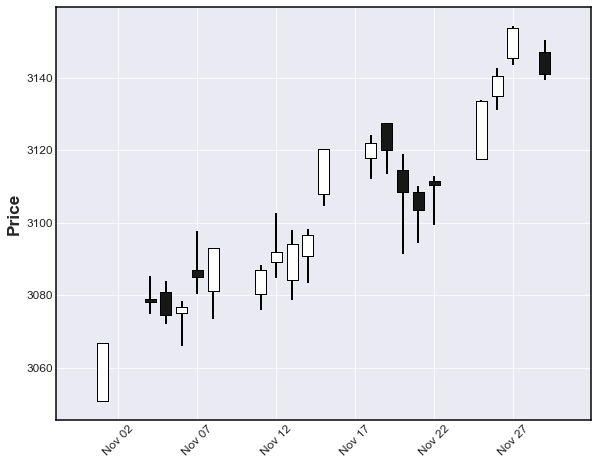

In [7]:
mpf.plot(daily,type='candle') # we can plot candlesticks also

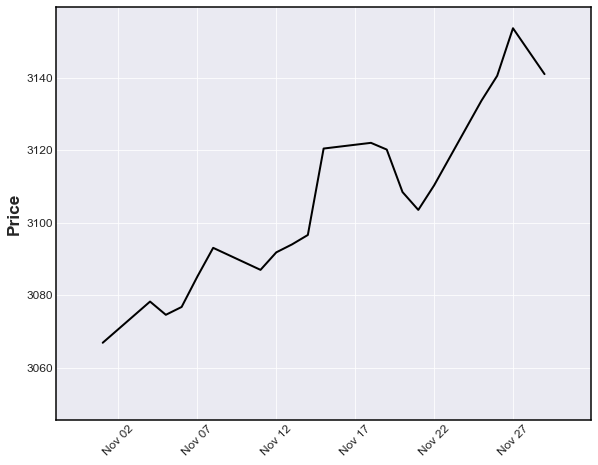

In [8]:
mpf.plot(daily,type='line')

---
## We can also plot moving averages with the `mav` keyword
### &nbsp;&nbsp;&nbsp; - use an integer for a single moving average 
### &nbsp;&nbsp;&nbsp; - use a tuple or list of integers for multiple moving averages

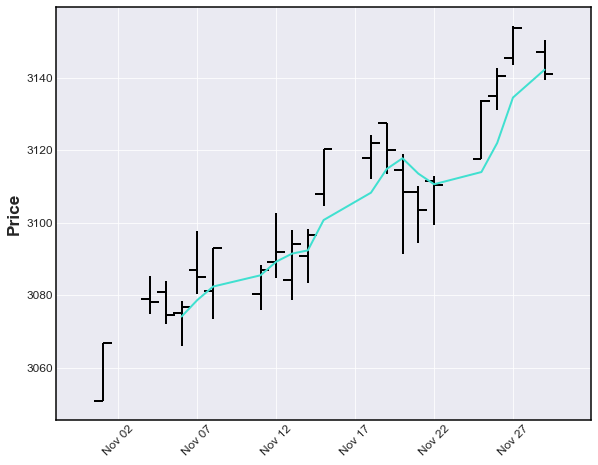

In [9]:
mpf.plot(daily,type='ohlc',mav=4)

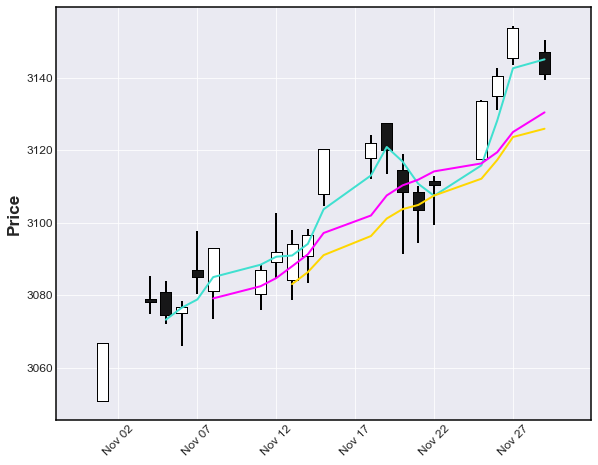

In [10]:
mpf.plot(daily,type='candle',mav=(3,6,9))

---
## We can also display `Volume`

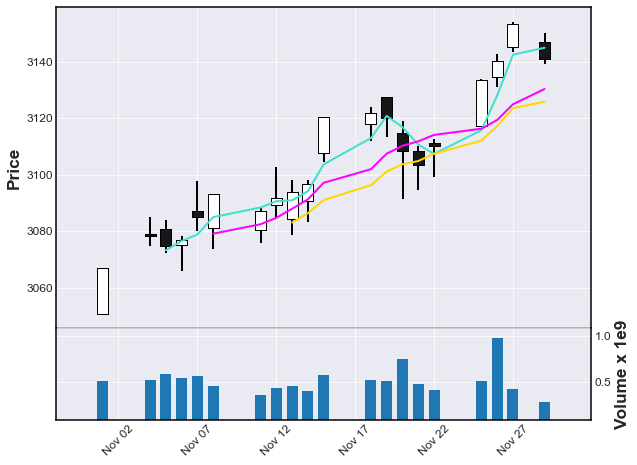

In [11]:
mpf.plot(daily,type='candle',mav=(3,6,9),volume=True)

---
## Notice, in the above chart, there are gaps along the x-coordinate corresponding to days on which there was no trading.  

## &nbsp;&nbsp;&nbsp; - Many people like to see these gaps so that they can tell, with a quick glance, where the weekends and holidays fall.  
## &nbsp;&nbsp;&nbsp; - For example, in the above chart you can see a gap at Thursday, November 28th for the U.S. Thanksgiving holiday.
---
## Gaps along the x-axis can be eliminated with the `no_xgaps` keyword

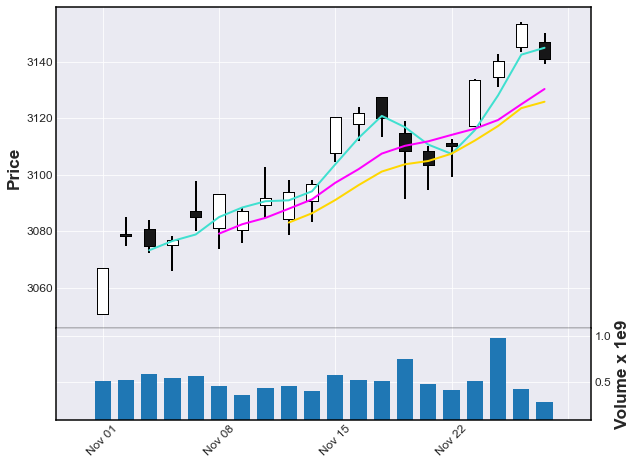

In [12]:
mpf.plot(daily,type='candle',mav=(3,6,9),volume=True,no_xgaps=True)

---

## Now let's look at some intraday data

In [13]:
intraday = pd.read_csv('data/SP500_NOV2019_IDay.csv',index_col=0,parse_dates=True)
intraday = intraday.drop('Volume',axis=1) # Volume is zero anyway for this intraday data set
intraday.index.name = 'Date'
intraday.shape
intraday.head(3)
intraday.tail(3)

(1563, 4)

,Open,Close,High,Low
Date,,,,
2019-11-05 09:30:00,3080.80,3080.49,3081.47,3080.30
2019-11-05 09:31:00,3080.33,3079.36,3080.33,3079.15
2019-11-05 09:32:00,3079.43,3079.68,3080.46,3079.43


,Open,Close,High,Low
Date,,,,
2019-11-08 15:57:00,3090.73,3090.70,3091.02,3090.52
2019-11-08 15:58:00,3090.73,3091.04,3091.13,3090.58
2019-11-08 15:59:00,3091.16,3092.91,3092.91,3090.96


---
## The above dataframe contains Open,High,Low,Close data at 1 minute intervervals for the S&P 500 stock index for November 5, 6, 7 and 8, 2019.

## Let's start by looking at the last hour of trading on November 6th, with a 7 minute and 12 minute moving average

### &nbsp;&nbsp;&nbsp; - Note: the interpretation of the `mav` integers depends on the frequency of the data.  It is the number of data points used in the Moving Average.

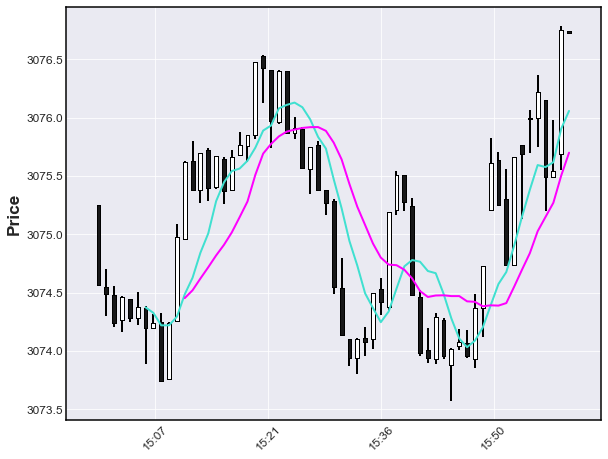

In [14]:
iday = intraday.loc['2019-11-06 15:00':'2019-11-06 16:00',:]
mpf.plot(iday,type='candle',mav=(7,12))

---
## Notice above that for intraday data the x-axis automatically displays TIME *instead of* date.
---
## Below we see that if the intraday data spans two (or more) trading days then two things happen:
- <b>The x-axis display BOTH TIME and DATE<b>
- <b>`no-xgaps` defaults to `True` FOR INTRADAY DATA INVOLVING TWO OR MORE TRADING DAYS</b>

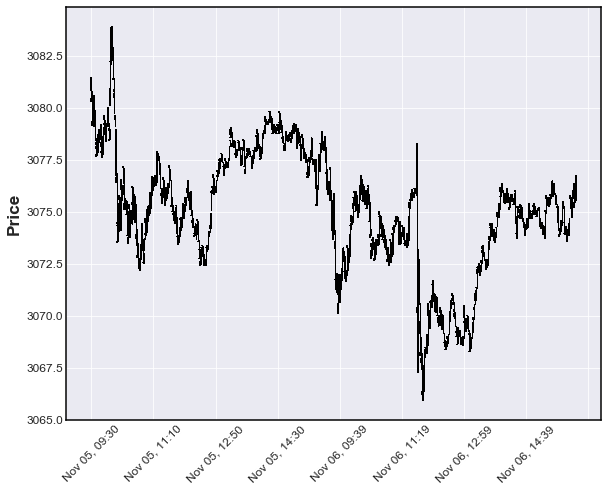

In [15]:
iday = intraday.loc['2019-11-05':'2019-11-06',:]
mpf.plot(iday,type='candle')

---
### Here (below) we see what would happend if `no_xgaps` did **NOT** default to `True`<br> for intraday data involving two or more days

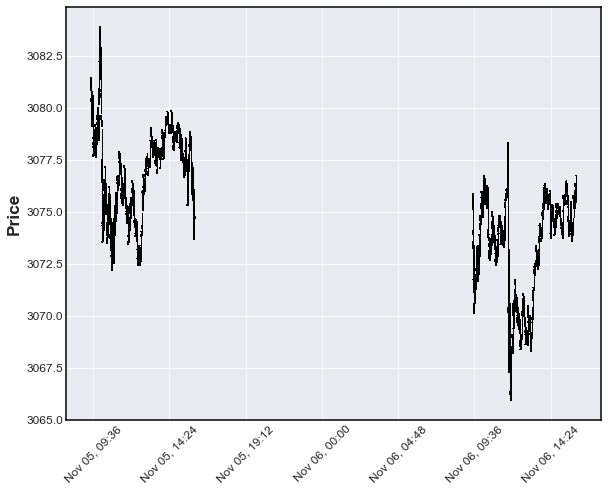

In [16]:
mpf.plot(iday,type='candle',no_xgaps=False)

---
### below: 4 days of intraday data with `no_xgaps=False`

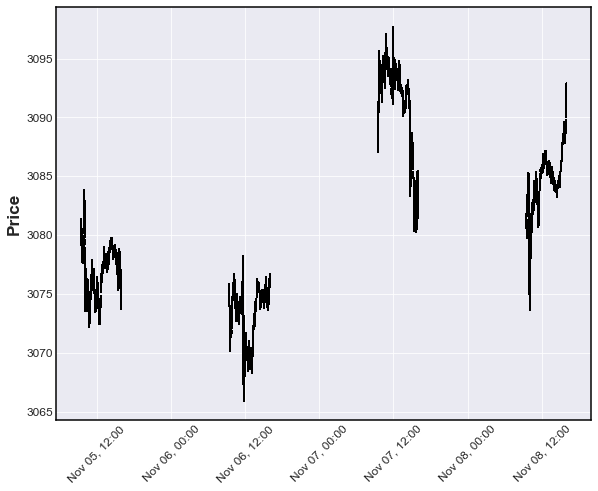

In [17]:
mpf.plot(intraday,type='ohlc',no_xgaps=False)  # 4 day of intraday with no_xgaps=False

---
### below: 4 days of intraday data:
#### &nbsp;&nbsp; - as mentioned above, `no_xgaps` defaults to `True` for intraday data spanning more than one day.

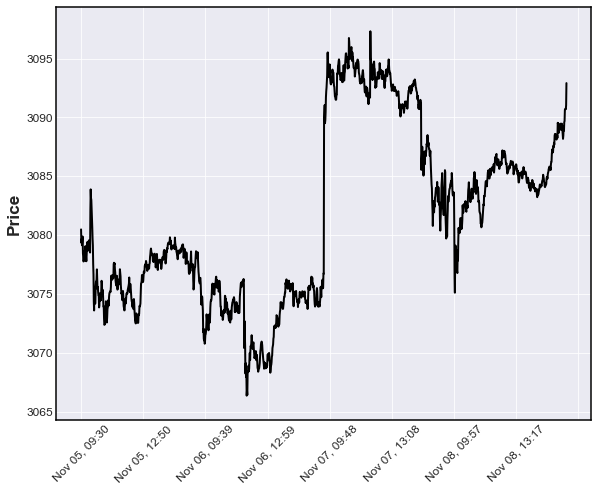

In [18]:
mpf.plot(intraday,type='line')  # intraday spanning more than one day defaults to no_xgaps=True

---
### Above: Intraday data spanning more than a day automatically shows BOTH DATE and TIME on x-axis
---
### Below: Similarly, daily data spanning more than a year ADDS THE *YEAR* to the DATE format

In [19]:
df = pd.read_csv('data/yahoofinance-SPY-20080101-20180101.csv',index_col=0,parse_dates=True)
df.shape
df.head(3)
df.tail(3)

(2519, 6)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-12-31,147.100006,147.610001,146.059998,146.210007,118.624741,108126800
2008-01-02,146.529999,146.990005,143.880005,144.929993,117.586205,204935600
2008-01-03,144.910004,145.490005,144.070007,144.860001,117.529449,125133300


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-12-27,267.380005,267.730011,267.010010,267.320007,267.320007,57751000
2017-12-28,267.890015,267.920013,267.450012,267.869995,267.869995,45116100
2017-12-29,268.529999,268.549988,266.640015,266.859985,266.859985,96007400


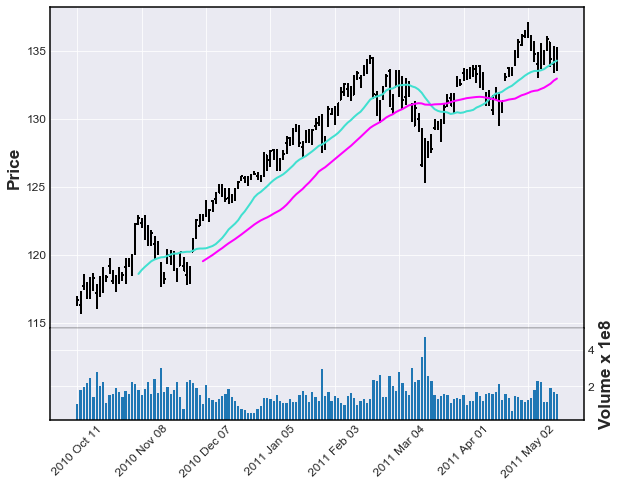

In [20]:
mpf.plot(df[700:850],type='bars',volume=True,no_xgaps=True,mav=(20,40),figscale=0.75)

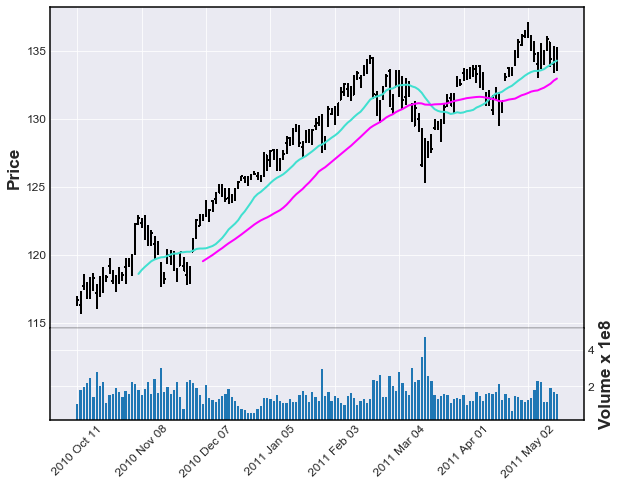

In [21]:
mpf.plot(df[700:850],type='bars',volume=True,no_xgaps=True,mav=(20,40))

---

##  COMING SOON:

- customize appearance of plot (colors, date format, etc)
- show trading signals on plot
- technical studies:
  - Trading Envelope
  - MACD
  - Bollinger Bands
- custom studies and/or additional data on plot
- save plot to file
 

---